In [1]:
# Imports 

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# Splitting the data 

train_data, test_data = tf.keras.utils.image_dataset_from_directory(
    directory='data',
    labels='inferred',
    label_mode=None,
    batch_size=32,
    image_size=(128, 128),
    validation_split=0.1,
    subset="both",
    seed=1)

Found 17534 files belonging to 1 classes.
Using 15781 files for training.
Using 1753 files for validation.


In [118]:
# Data Preprocessing

norm = layers.Rescaling(scale=1./255)
noise = layers.GaussianNoise(0.5)

noise(train_data)
norm_train_data = train_data.map(lambda x: norm(x))
noise_train_data = norm_train_data.map(lambda x: noise(x))

norm_test_data = test_data.map(lambda x: norm(x))
noise_test_data = norm_test_data.map(lambda x: noise(x))

AttributeError: '_IterableDataset' object has no attribute 'shape'

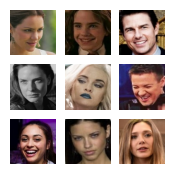

In [114]:
plt.figure(figsize=(2, 2))
for images in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

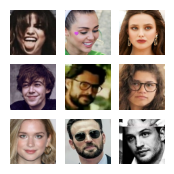

In [116]:
plt.figure(figsize=(2, 2))
for images in noise_train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("float32"))
        plt.axis("off")